In [1]:
import pandas as pd

In [2]:
# Read the data
p_2 = pd.read_excel('Credit-Banking-3.xlsx', sheet_name= 'Project_2')
c_info = pd.read_excel('Credit-Banking-3.xlsx', sheet_name= 'Curtomer_Info')

In [3]:
p_2. head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
0,4595.0,534,SHOES,New,RKFCM,1484.74,1471.74,BN710,2014-08-26,17:16:17,3109172,547836726,Peninsula Beauty,YE5901,Prepaid card,30462,0,NaT
1,6679.0,396,LUGGAGE,New,TNVON,1452.50,1442.50,KF815,2014-01-26,15:40:52,7583605,279617132,DODOcase,UW7354,Mobile carrier Billing,37927,0,NaT
2,7075.0,449,SHOES,Refurbished,VKKEA,4308.02,4284.02,UG960,2014-01-03,01:29:05,9985192,633765867,Staples,VN6656,Credit card,80640,0,NaT
3,1418.0,145,BEDDING,New,PIUEM,3272.59,3249.59,DK471,2014-05-30,09:10:00,7720605,734500382,Road Runner Sports,MS6579,Prepaid card,58692,0,NaT
4,6740.0,844,ELECTRONICS,Used,FMBZC,628.67,608.67,OJ311,2014-08-14,05:31:30,8367528,241944637,L'Occitane,GN3944,Debit card,21505,0,NaT


In [4]:
c_info.head(5)

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address
0,3768,eddie@yahoomail.com,EDDIE,9045258449,M,83,Louisville,Kentucky,Masked
1,4852,rose@hotmail.com,ROSE,8834789103,F,87,Kansas City,Missouri,Masked
2,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked
3,4807,clarence@gmail.com,CLARENCE,9394398429,M,37,Seattle,Washington,Masked
4,9131,johnny@hotmail.com,JOHNNY,9976623538,F,80,Columbus,Ohio,Masked


# Data Cleaning

#### Fixing the Age values which are less than 18

In [5]:
def replace_age_less_than_18(df):
    # Calculate the average age of entries where age is greater than or equal to 18
    average_age = df[df['Age'] >= 18]['Age'].mean()
    # Replace ages less than 18 with the average age
    df.loc[df['Age'] < 18, 'Age'] = average_age
    return df

##### Data frame "c_info_no18" is the new data frame where the age is >18

In [6]:
c_info_no18= replace_age_less_than_18(c_info)

# Display the first few rows of the updated 'c_info' DataFrame
print("Updated Customer_Info DataFrame:")
c_info_no18.head()

Updated Customer_Info DataFrame:


,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address
0,3768,eddie@yahoomail.com,EDDIE,9045258449,M,83.0,Louisville,Kentucky,Masked
1,4852,rose@hotmail.com,ROSE,8834789103,F,87.0,Kansas City,Missouri,Masked
2,1174,amy@yahoomail.com,AMY,9557690013,F,31.0,Seattle,Washington,Masked
3,4807,clarence@gmail.com,CLARENCE,9394398429,M,37.0,Seattle,Washington,Masked
4,9131,johnny@hotmail.com,JOHNNY,9976623538,F,80.0,Columbus,Ohio,Masked


#### Checking for Unique Transaction ID

In [7]:
total_entries = p_2.shape[0]

# Count number of unique entries in each column
unique_entries = p_2['Transaction ID'].nunique()

# Print the results
print("Total number of Transaction ID in p_2:", total_entries)
print("Number of unique Transaction ID in each column:",unique_entries )

Total number of Transaction ID in p_2: 9999
Number of unique Transaction ID in each column: 1419


#### Update Selling Price where Coupon ID is NULL

In [8]:
p_2.loc[p_2['Coupon_ID'].isnull(), 'Selling_price'] = p_2['Price ']
# Print the updated DataFrame
print(p_2.shape[0])


9999


#### Make sure that the return date is after the Purchase Date.

In [9]:
# Convert 'Date' and 'Return_date' columns to datetime objects
p_2['Date'] = pd.to_datetime(p_2['Date'], errors='coerce')
p_2['Return_date'] = pd.to_datetime(p_2['Return_date'], errors='coerce')

##### Filter rows where return date is after purchase date i.e., "fixed_data" is the new data frame

In [10]:
fixed_data = p_2[p_2['Return_date'] > p_2['Date']]
print("No of Rows where the retrun date is after purchase date: ",fixed_data.shape[0])
# Print the filtered DataFrame
fixed_data

No of Rows where the retrun date is after purchase date:  1507


,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
9,5974.0,470,LUGGAGE,Used,TNVON,4783.25,4764.25,ER876,2014-09-23,05:13:44,4604782,832455526,REI,EI6775,Credit card,28877,1,2014-09-30
28,7979.0,389,CLOTHING,New,GTFFL,3747.69,3704.69,JL124,2014-01-17,13:11:00,2948611,793611328,Guitar Center,GN4079,Credit card,88335,1,2014-01-24
48,8532.0,544,APPLIANCES,Used,BUDLO,2135.85,2085.85,WR271,2014-04-27,21:07:55,7286957,436997432,The Vitamin Shoppe,HW9976,Mobile carrier Billing,73080,1,2014-05-04
73,6502.0,662,BABY CLOTHING,New,CTAOI,4658.93,4609.93,JJ698,2014-10-03,21:17:54,5570207,303879646,Peninsula Beauty,YE5901,Mobile carrier Billing,10537,1,2014-10-10
101,4139.0,534,DECOR,Refurbished,ZACKV,4981.73,4942.73,FU981,2014-09-29,21:56:13,1166080,907961267,Ulta,UO9656,Mobile carrier Billing,40788,1,2014-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,2297.0,875,DECOR,Refurbished,LBVIW,4993.38,4982.38,GJ767,2014-11-16,13:34:42,8409303,750329878,Cole Hardware,EX7730,Mobile carrier Billing,81742,1,2014-11-23
2076,2804.0,572,LUGGAGE,New,CENQJ,3277.74,3236.74,RQ273,2014-01-04,23:34:49,6768153,118771647,Gymboree,ZF8986,Credit card,53335,1,2014-01-11
2077,6071.0,539,SHOES,Refurbished,RKFCM,2837.17,2788.17,SP318,2014-03-06,19:56:24,8203351,616941539,Barnes & Noble,EY1658,Mobile carrier Billing,40144,1,2014-03-13
2078,6286.0,773,SHOES,New,MQSLF,645.10,611.10,NN757,2014-07-09,08:17:34,3426320,996119693,Nine West,RM9837,Mobile carrier Billing,68552,1,2014-07-16


#### Rows with missing Credit Card details

In [11]:
rows_with_null = p_2[p_2['Credit_card'].isnull()]

# Print the rows with null values
print("Rows with null values:", rows_with_null.shape[0])
rows_with_null

Rows with null values: 5


,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
10,NaN,266,COMPUTERS,Used,GCVNE,2143.08,2098.08,MS262,2014-07-03,17:23:52,8417362,243355173,REI,EI6774,Credit card,74588,0,NaT
15,NaN,710,KITCHEN & DINING,New,RGMIK,663.82,650.82,ZG209,2014-04-26,17:41:01,8042908,596308320,Road Runner Sports,MS6579,Mobile carrier Billing,15559,0,NaT
38,NaN,956,SHOES,Used,DYHNA,2800.18,2751.18,GP301,2014-01-25,22:07:02,6805351,352232665,Gymboree,ZF8986,Prepaid card,16647,0,NaT
39,NaN,539,ELECTRONICS,New,OULOW,668.11,621.11,VE748,2014-01-28,00:19:14,3482483,494669159,DFLOWERS,ZG2587,Credit card,6175,0,NaT
40,NaN,300,COMPUTERS,Used,YXQFM,2455.58,2435.58,YM653,2014-08-31,03:59:31,6302431,244787369,L'Occitane,GN4124,Credit card,78902,0,NaT


#### Identity where Price is equal to Selling Price even after having a Coupon Code, apply an automatic discount of 5% for those entries.

In [14]:
# Identify rows where Price is equal to Selling_price despite having a Coupon Code
update_indices = (p_2['Price '] == p_2['Selling_price']) & p_2['Coupon_ID'].notnull()

# Apply automatic discount of 5% for those entries
discount_amount = 0.05  # 5% discount
p_2.loc[update_indices, 'Selling_price'] *= (1 - discount_amount)

# Print the updated DataFrame
print("Checking that no data is lost: ",p_2.shape[0])


Checking that no data is lost:  9999


# Tasks

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Customer Segmentation Based on Spend in Dollars, based on Swipes.

In [16]:
# Customer Segmentation Based on Spend in Dollars, based on Swipes
def spend_segmentation(row):
    spend = row['Price ']

    if spend >= 1000:
        return 'High Spend'
    elif spend >= 500:
        return 'Medium Spend'
    elif spend >= 100:
        return 'Low Spend'
    else:
        return 'Very Low Spend'

# Apply segmentation function to each row
p_2.loc[:, 'Spend_Segment'] = p_2.apply(spend_segmentation, axis=1)


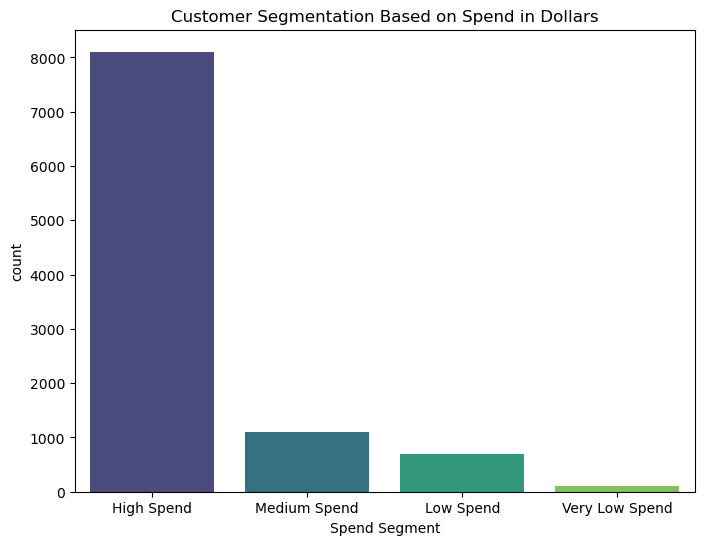

In [18]:
# Plot spend segmentation distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=p_2, x='Spend_Segment', palette='viridis')
plt.title('Customer Segmentation Based on Spend in Dollars')
plt.xlabel('Spend Segment')
plt.show()


### 1.2 Customer Segmentation Based on Spend in Dollars, based on genderand age group.

In [19]:
# Customer Segmentation Based on Spend in Dollars, based on Gender and Age Group
def gender_age_segmentation(row):
    gender = row['Gender']
    age = row['Age']

    if gender == 'F' and age >= 18 and age <= 35:
        return 'Young Females'
    elif gender == 'F' and age >= 35 and age <= 60:
        return 'Middle Aged Females'
    elif gender == 'F' and age >60 :
        return 'Old Females'
    
    elif gender == 'M' and age >= 18 and age <= 35:
        return 'Young Males'
    elif gender == 'M' and age >= 35 and age <= 60:
        return 'Middle Aged Males'
    elif gender == 'M' and age >60:
        return 'Old Males'
    else:
        return 'Other'

# Apply segmentation function to each row
c_info_no18['Gender_Age_Segment'] = c_info_no18.apply(gender_age_segmentation, axis=1)

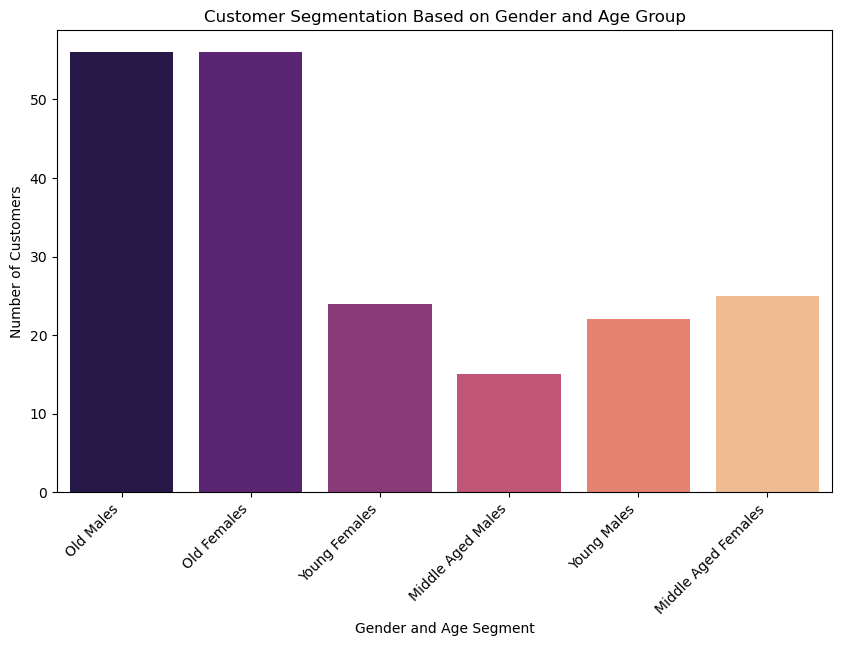

In [20]:
# Plot gender and age segmentation distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=c_info_no18, x='Gender_Age_Segment', palette='magma')
plt.title('Customer Segmentation Based on Gender and Age Group')
plt.xlabel('Gender and Age Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()


### 2 Calculate the spend in terms of Product, State and Payment method. 

In [21]:
final_d = p_2
# Calculate spend in terms of Product
product_spend = final_d.groupby('P_CATEGORY')['Price '].sum()

# Calculate spend in terms of State
state_spend = final_d.groupby('CONDTION')['Price '].sum()

# Calculate spend in terms of Payment Method
payment_method_spend = final_d.groupby('Payment Method')['Price '].sum()

# Print the results
print("Spend in terms of Product: ")
print(product_spend)
print("\nSpend in terms of State: ")
print(state_spend)
print("\nSpend in terms of Payment Method: ")
print(payment_method_spend)


Spend in terms of Product: 
P_CATEGORY
APPLIANCES          1526966.54
BABY CLOTHING       1356488.30
BABY TOYS           1126831.11
BEDDING             1677721.45
CLOTHING            1997145.86
COMPUTERS           3098188.82
DECOR               3235271.29
ELECTRONICS         2717022.42
GAMES               1535715.09
KITCHEN & DINING    2039579.71
LUGGAGE             1440545.12
OFFICE SUPPLIES     2489487.19
SHOES               2327168.27
Name: Price , dtype: float64

Spend in terms of State: 
CONDTION
New            13364520.91
Refurbished     6463861.18
Used            6739749.08
Name: Price , dtype: float64

Spend in terms of Payment Method: 
Payment Method
Credit card                9638188.90
Debit card                  840582.75
Deirect debits              155931.37
Gift card                   184101.68
Mobile carrier Billing    10975756.54
Paypal wallet               226038.96
Prepaid card               4547530.97
Name: Price , dtype: float64


### 3 Calculate the highest 5 spending in all above categories. 


In [22]:

# Calculate highest 5 spending in terms of Product
top_product_spend = final_d.groupby('P_CATEGORY')['Price '].sum().nlargest(5)

# Calculate highest 5 spending in terms of State
top_state_spend = final_d.groupby('CONDTION')['Price '].sum().nlargest(5)

# Calculate highest 5 spending in terms of Payment Method
top_payment_method_spend = final_d.groupby('Payment Method')['Price '].sum().nlargest(5)

# Print the results
print("Highest 5 spending in terms of Product:")
print(top_product_spend)
print("\nHighest 5 spending in terms of State:")
print(top_state_spend)
print("\nHighest 5 spending in terms of Payment Method:")
print(top_payment_method_spend)


Highest 5 spending in terms of Product:
P_CATEGORY
DECOR              3235271.29
COMPUTERS          3098188.82
ELECTRONICS        2717022.42
OFFICE SUPPLIES    2489487.19
SHOES              2327168.27
Name: Price , dtype: float64

Highest 5 spending in terms of State:
CONDTION
New            13364520.91
Used            6739749.08
Refurbished     6463861.18
Name: Price , dtype: float64

Highest 5 spending in terms of Payment Method:
Payment Method
Mobile carrier Billing    10975756.54
Credit card                9638188.90
Prepaid card               4547530.97
Debit card                  840582.75
Paypal wallet               226038.96
Name: Price , dtype: float64


### 4 Give your opinion on return category like customers returning the products belongs to which state, age group, condition, category of the product or is it related to discount. 



In [23]:
# Discount
final_d['Discount']= final_d['Price ']- final_d['Selling_price']

# Group the data by different factors and calculate the return rates
return_rates = final_d.groupby(['CONDTION', 'P_CATEGORY', 'Discount'])['Return_ind'].mean().reset_index()

# Sort the data by return rates to identify patterns
sorted_return_rates = return_rates.sort_values(by='Return_ind', ascending=False)

# Print the top 10 combinations with the highest return rates
print("Top 10 combinations with the highest return rates:")
print(sorted_return_rates.head(10))


Top 10 combinations with the highest return rates:
        CONDTION       P_CATEGORY  Discount  Return_ind
501  Refurbished         CLOTHING  189.8655         1.0
224          New      ELECTRONICS   33.4055         1.0
403          New            SHOES  198.9440         1.0
658  Refurbished  OFFICE SUPPLIES  240.1085         1.0
629  Refurbished  OFFICE SUPPLIES    0.0000         1.0
906         Used            GAMES  123.0920         1.0
460  Refurbished        BABY TOYS  244.6555         1.0
475  Refurbished          BEDDING   99.0415         1.0
36           New    BABY CLOTHING  232.9465         1.0
272          New            GAMES  212.9110         1.0


### 5 Create a profile of customers in terms of timing of their order. 


In [24]:
# Convert 'Order_Date_Time' to datetime format
p_2['Date'] = pd.to_datetime(p_2['Date'])

# Extract day of the week, and month of the year
p_2['Day_of_Week'] = p_2['Date'].dt.day_name()
p_2['Month'] = p_2['Date'].dt.month_name()

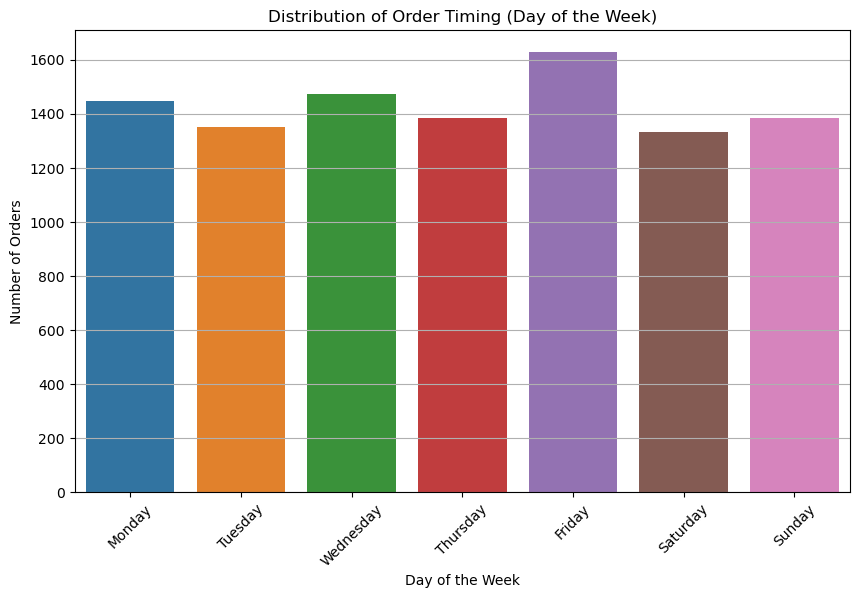

In [25]:
# Plot distribution of order timing: day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=p_2, x='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Order Timing (Day of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

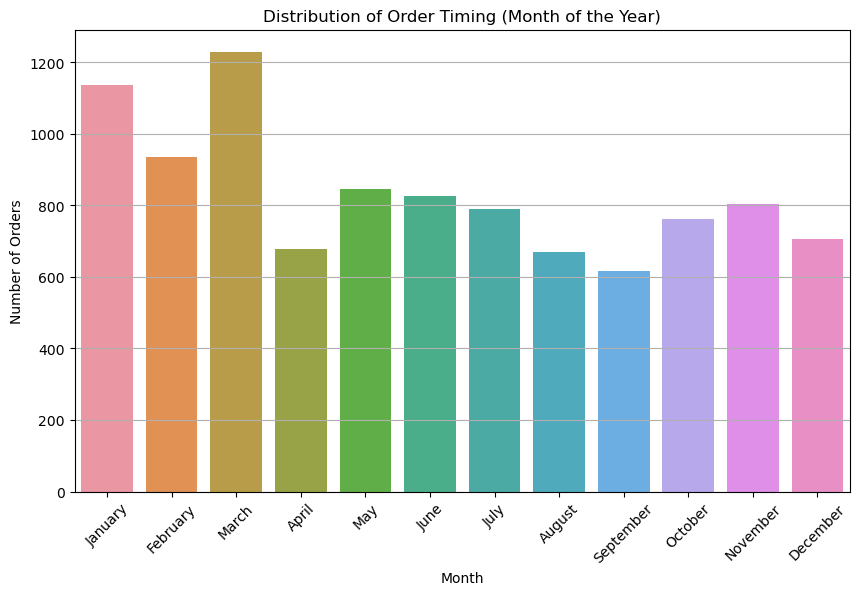

In [26]:
# Plot distribution of order timing: month of the year
plt.figure(figsize=(10, 6))
sns.countplot(data=p_2, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Distribution of Order Timing (Month of the Year)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### 6 Which payment method is providing more discount for customers? 

In [27]:

# Calculate total discount provided for each payment method
total_discount_per_payment_method = final_d.groupby('Payment Method')['Discount'].sum()

# Find the payment method providing the maximum total discount
max_discount_payment_method = total_discount_per_payment_method.idxmax()
max_discount_value = total_discount_per_payment_method.max()

# Print the results
print("Payment method providing more discount for customers:")
print(max_discount_payment_method)


Payment method providing more discount for customers:
Mobile carrier Billing


### 7 Create a profile for high value items vs low value items and relate that wrt to their number of orders. 


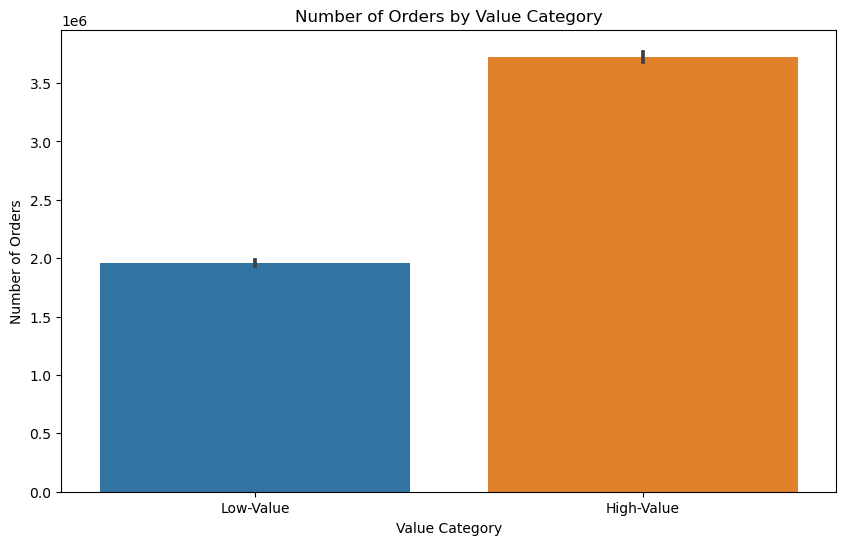

In [28]:
value_threshold = 2000

# Categorize items as high-value or low-value based on the threshold
final_d['Value_Category'] = final_d['Price '].apply(lambda x: 'High-Value' if x >= value_threshold else 'Low-Value')

# Plot the distribution of orders for high-value and low-value items
plt.figure(figsize=(10, 6))
sns.barplot(data=final_d, x='Value_Category', y='Product_ID', estimator=sum)
plt.title('Number of Orders by Value Category')
plt.xlabel('Value Category')
plt.ylabel('Number of Orders')
plt.show()

### 8 Do you think if merchant provides more discount then can it will lead to increase in number of orders?

##### Conclusion  -> No the product with less discount are bought more often rather than the items with higher discount

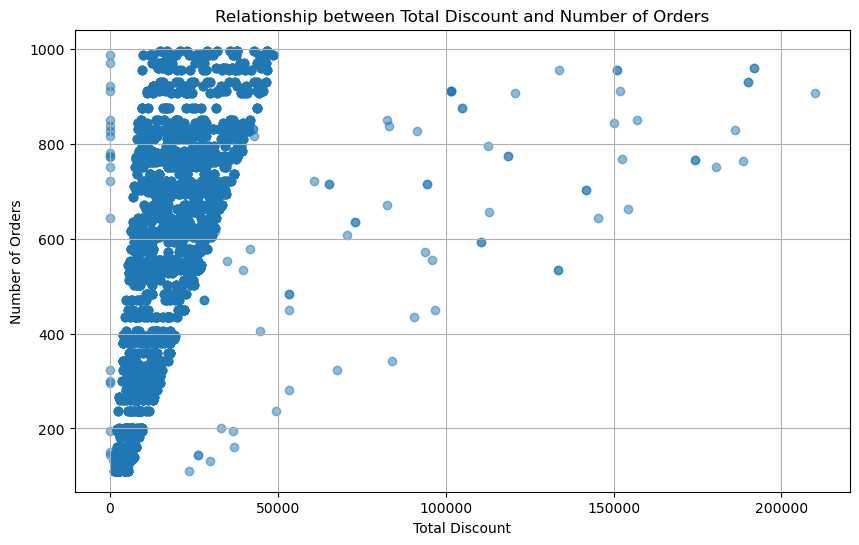

In [62]:

# Calculate the total discount provided for each order
final_d['Total_Discount'] = final_d['Discount'] * final_d['Product_ID']

# Plot the relationship between total discount and number of orders
plt.figure(figsize=(10, 6))
plt.scatter(final_d['Total_Discount'], final_d['Product_ID'], alpha=0.5)
plt.title('Relationship between Total Discount and Number of Orders')
plt.xlabel('Total Discount')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()
